## Imports and Load Data

In [20]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the data into dataframe
df = pd.read_csv("melb_data2.csv")

In [3]:
# check if the data successfully loaded
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Ascot Vale,2/43 Roxburgh St,2,u,455000.0,S,Nelson,3/09/2016,5.9,3032,...,1.0,2.0,0.0,NaN,NaN,Moonee Valley,-37.7756,144.9165,Western Metropolitan,6567.0
1,Ascot Vale,30 Rothwell St,3,h,940000.0,S,Nelson,3/12/2016,5.9,3032,...,1.0,2.0,298.0,108.0,1920.0,Moonee Valley,-37.7777,144.9195,Western Metropolitan,6567.0
2,Ascot Vale,9/5 Rothwell St,2,u,467000.0,SP,Brad,3/12/2016,5.9,3032,...,1.0,1.0,0.0,62.0,1980.0,Moonee Valley,-37.7761,144.9201,Western Metropolitan,6567.0
3,Ascot Vale,7 Francis St,3,h,1380000.0,SP,Nelson,4/03/2017,5.9,3032,...,2.0,2.0,277.0,174.0,1910.0,Moonee Valley,-37.7777,144.9221,Western Metropolitan,6567.0
4,Ascot Vale,2/21 Harold St,2,u,490000.0,VB,Jellis,4/03/2017,5.9,3032,...,1.0,1.0,423.0,62.0,1970.0,Moonee Valley,-37.7736,144.9015,Western Metropolitan,6567.0


## Data Exploration

In [4]:
#check all columns and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         1129 non-null   object 
 1   Address        1129 non-null   object 
 2   Rooms          1129 non-null   int64  
 3   Type           1129 non-null   object 
 4   Price          1129 non-null   float64
 5   Method         1129 non-null   object 
 6   SellerG        1129 non-null   object 
 7   Date           1129 non-null   object 
 8   Distance       1129 non-null   float64
 9   Postcode       1129 non-null   int64  
 10  Bedroom2       1129 non-null   float64
 11  Bathroom       1129 non-null   float64
 12  Car            1113 non-null   float64
 13  Landsize       1129 non-null   float64
 14  BuildingArea   601 non-null    float64
 15  YearBuilt      713 non-null    float64
 16  CouncilArea    1079 non-null   object 
 17  Lattitude      1129 non-null   float64
 18  Longtitu

In [5]:
# column used : Suburb, Address, Rooms, Type, Price, Distance, Landsize, Bedroom2, BuildingArea, Regionname
df1 = df[['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Distance', 'Landsize', 'Bedroom2', 'BuildingArea', 'Regionname']]
df1.head()

,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname
0,Ascot Vale,2/43 Roxburgh St,2,u,455000.0,5.9,0.0,3.0,NaN,Western Metropolitan
1,Ascot Vale,30 Rothwell St,3,h,940000.0,5.9,298.0,3.0,108.0,Western Metropolitan
2,Ascot Vale,9/5 Rothwell St,2,u,467000.0,5.9,0.0,2.0,62.0,Western Metropolitan
3,Ascot Vale,7 Francis St,3,h,1380000.0,5.9,277.0,3.0,174.0,Western Metropolitan
4,Ascot Vale,2/21 Harold St,2,u,490000.0,5.9,423.0,2.0,62.0,Western Metropolitan


In [6]:
# Check used columns and data type
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Suburb        1129 non-null   object 
 1   Address       1129 non-null   object 
 2   Rooms         1129 non-null   int64  
 3   Type          1129 non-null   object 
 4   Price         1129 non-null   float64
 5   Distance      1129 non-null   float64
 6   Landsize      1129 non-null   float64
 7   Bedroom2      1129 non-null   float64
 8   BuildingArea  601 non-null    float64
 9   Regionname    1129 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 88.3+ KB


In [7]:
# find most popular house by number of rooms
df1['Rooms'].value_counts()


Rooms
2    525
3    341
1    146
4     98
5     15
6      4
Name: count, dtype: int64

House with 2 rooms is the most popular one, and then followed by 3 rooms. House with many rooms like 5 or 6 rooms is less popular

In [30]:
# find most popular house by type
df1['Type'].value_counts()

Type
u    520
h    518
t     91
Name: count, dtype: int64

Type u and h House are very popular. However type t town house is less popular

## Handling Missing Values

We have many missing values on BuildingArea. Logically BuildingArea will relate to total number of room. So We will use this intuition to fill the missing values.
Step handling misssing values in this project:
1. Check the missing values
2. Add helping column `Total_room`
3. Add helping column `area_per_room`
4. Calculate mean of `area_per_room`
5. Replace missing values with mean of `area_per_room` times `Total_room`

In [8]:
# Check missing values
df1.isnull().sum()

Suburb            0
Address           0
Rooms             0
Type              0
Price             0
Distance          0
Landsize          0
Bedroom2          0
BuildingArea    528
Regionname        0
dtype: int64

In [9]:
# Addressing missing values


df1.loc[:,'Total_room']= df1['Rooms'] + df1['Bedroom2'] 
df1.loc[:,'area_per_room'] = df1['BuildingArea'] / df1['Total_room']
df1['area_per_room'].mean()

23.077913398304414

In [10]:
df1.loc[:,'BuildingArea'] = np.where(np.isnan(df1['BuildingArea']), df1['area_per_room'].mean() * df1['Total_room'], df1['BuildingArea']  )
df1 = df1[['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Distance', 'Landsize', 'Bedroom2', 'BuildingArea', 'Regionname']]
df1.head()

,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname
0,Ascot Vale,2/43 Roxburgh St,2,u,455000.0,5.9,0.0,3.0,115.389567,Western Metropolitan
1,Ascot Vale,30 Rothwell St,3,h,940000.0,5.9,298.0,3.0,108.000000,Western Metropolitan
2,Ascot Vale,9/5 Rothwell St,2,u,467000.0,5.9,0.0,2.0,62.000000,Western Metropolitan
3,Ascot Vale,7 Francis St,3,h,1380000.0,5.9,277.0,3.0,174.000000,Western Metropolitan
4,Ascot Vale,2/21 Harold St,2,u,490000.0,5.9,423.0,2.0,62.000000,Western Metropolitan


In [11]:
# Check statistics of the data

df1.describe()

,Rooms,Price,Distance,Landsize,Bedroom2,BuildingArea
count,1129.000000,1.129000e+03,1129.000000,1129.000000,1129.000000,1129.000000
mean,2.400354,1.008926e+06,3.747033,605.767936,2.372896,110.293782
std,0.891767,5.865173e+05,1.774492,2375.855979,0.882257,52.108049
min,1.000000,2.100000e+05,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.700000e+05,2.700000,0.000000,2.000000,79.000000
50%,2.000000,8.880000e+05,3.400000,142.000000,2.000000,92.311654
75%,3.000000,1.280000e+06,4.300000,321.000000,3.000000,138.467480
max,6.000000,5.700000e+06,8.700000,37000.000000,6.000000,450.000000


## Handle Outlier
In this project We will replace the outlier with limit value.
1. Value that very high will replace with upper limit (mean + 3 std)
2. Value that very low will replace with lower limit (mean - 3 std)

In [12]:

upper_limit = df1['Landsize'].mean() + 3 * df1['Landsize'].std()
print(upper_limit)
lower_limit = df1['Landsize'].mean() - 3 * df1['Landsize'].std()
print(lower_limit)
df1[(df1["Landsize"] > upper_limit) | (df1["Landsize"] < lower_limit )]

7733.335873916106
-6521.800001462608


,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname
262,Maribyrnong,44/2 Horizon Dr,2,u,495000.0,8.7,37000.0,2.0,92.311654,Western Metropolitan
408,Port Melbourne,36/3 Seisman Pl,2,u,1340000.0,3.8,21700.0,2.0,92.311654,Southern Metropolitan
514,South Yarra,413/35 Malcolm St,1,u,315000.0,3.3,14500.0,1.0,46.155827,Southern Metropolitan
522,South Yarra,503/99 River St,2,u,978500.0,3.3,17200.0,2.0,92.311654,Southern Metropolitan
624,South Yarra,504/79 River St,2,u,827000.0,3.3,17200.0,2.0,92.311654,Southern Metropolitan
812,Port Melbourne,55/4 Seisman Pl,2,u,1030000.0,3.8,21715.0,2.0,99.000000,Southern Metropolitan
828,South Yarra,403/79 River St,2,u,850000.0,3.3,17200.0,2.0,92.311654,Southern Metropolitan
894,Maribyrnong,2/6 Horizon Dr,2,u,585000.0,4.3,37000.0,2.0,90.000000,Western Metropolitan
936,Southbank,61/120 Sturt St,2,u,642500.0,0.7,8888.0,2.0,77.000000,Southern Metropolitan
1005,South Yarra,308/800 Chapel St,2,u,762500.0,2.7,17200.0,2.0,79.000000,Southern Metropolitan


In [13]:
upper_limit = df1['Price'].mean() + 3 * df1['Price'].std()
print(upper_limit)
lower_limit = df1['Price'].mean() - 3 * df1['Price'].std()
print(lower_limit)
df1[(df1["Price"] > upper_limit) | (df1["Price"] < lower_limit )]

2768477.547324546
-750626.3002031998


,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname
92,Carlton North,989 Drummond St,3,h,2950000.0,3.2,499.0,3.0,164.000000,Northern Metropolitan
328,North Melbourne,10 Canning St,4,h,2920000.0,2.3,310.0,4.0,276.000000,Northern Metropolitan
493,Port Melbourne,126 Heath St,3,h,3705000.0,3.8,214.0,3.0,241.000000,Southern Metropolitan
561,South Yarra,18 Avoca St,4,h,5700000.0,3.3,292.0,4.0,272.000000,Southern Metropolitan
565,South Yarra,10 Luxton Rd,3,h,2870000.0,3.3,350.0,3.0,138.467480,Southern Metropolitan
586,South Yarra,70 Park St,3,h,3000000.0,3.3,191.0,3.0,175.000000,Southern Metropolitan
728,East Melbourne,110 Vale St,2,h,4525000.0,1.5,220.0,2.0,279.000000,Northern Metropolitan
729,East Melbourne,124 Powlett St,3,h,3520000.0,1.5,364.0,2.0,115.389567,Northern Metropolitan
765,Carlton North,235 Amess St,4,h,3450000.0,3.2,515.0,4.0,203.000000,Northern Metropolitan
797,Parkville,21 Morrah St,4,h,3970000.0,2.6,289.0,4.0,184.623307,Northern Metropolitan


In [14]:
upper_limit = df1['BuildingArea'].mean() + 3 * df1['BuildingArea'].std()
print(upper_limit)
lower_limit = df1['BuildingArea'].mean() - 3 * df1['BuildingArea'].std()
print(lower_limit)
df1[(df1["BuildingArea"] > upper_limit) | (df1["BuildingArea"] < lower_limit )]

266.61792875587554
-46.03036560087402


,Suburb,Address,Rooms,Type,Price,Distance,Landsize,Bedroom2,BuildingArea,Regionname
5,Ascot Vale,44 The Parade,4,h,1850000.0,5.9,478.0,4.0,270.000000,Western Metropolitan
9,Ascot Vale,75 Maribyrnong Rd,6,h,2425000.0,5.9,1014.0,6.0,435.000000,Western Metropolitan
39,Ascot Vale,26 Ayr St,6,h,1430000.0,5.9,461.0,4.0,286.000000,Western Metropolitan
84,Ascot Vale,5 Doncaster St,4,h,1705000.0,5.9,598.0,4.0,273.000000,Western Metropolitan
175,Kensington,11 Nottingham St,5,h,1710000.0,4.2,566.0,5.0,270.000000,Northern Metropolitan
193,Kensington,11 Nottingham St,5,h,1900000.0,4.2,566.0,5.0,270.000000,Northern Metropolitan
243,Maribyrnong,4 Platypus Ct,5,h,1150000.0,8.7,446.0,5.0,286.000000,Western Metropolitan
260,Maribyrnong,12 Newstead St,4,h,1900000.0,8.7,865.0,4.0,374.000000,Western Metropolitan
328,North Melbourne,10 Canning St,4,h,2920000.0,2.3,310.0,4.0,276.000000,Northern Metropolitan
404,Port Melbourne,22 Gellibrand Rd,6,h,1800000.0,3.8,353.0,6.0,276.934961,Southern Metropolitan


In [15]:
# Correlation
df1.corr(numeric_only=True)

,Rooms,Price,Distance,Landsize,Bedroom2,BuildingArea
Rooms,1.000000,0.615490,0.274367,-0.045787,0.956029,0.825897
Price,0.615490,1.000000,-0.047909,-0.052342,0.593988,0.639780
Distance,0.274367,-0.047909,1.000000,0.036999,0.287890,0.268244
Landsize,-0.045787,-0.052342,0.036999,1.000000,-0.043251,-0.038056
Bedroom2,0.956029,0.593988,0.287890,-0.043251,1.000000,0.815137
BuildingArea,0.825897,0.639780,0.268244,-0.038056,0.815137,1.000000


<Axes: >

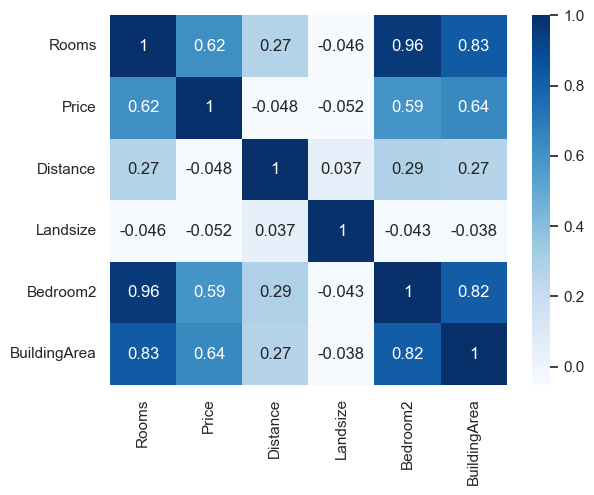

In [24]:

corr = df1.corr(numeric_only=True)
sns.heatmap(corr, cmap="Blues", annot=True)

In [22]:
features_corr = df1.corr(numeric_only=True)['Price'].sort_values()
features_corr

Landsize       -0.052342
Distance       -0.047909
Bedroom2        0.593988
Rooms           0.615490
BuildingArea    0.639780
Price           1.000000
Name: Price, dtype: float64

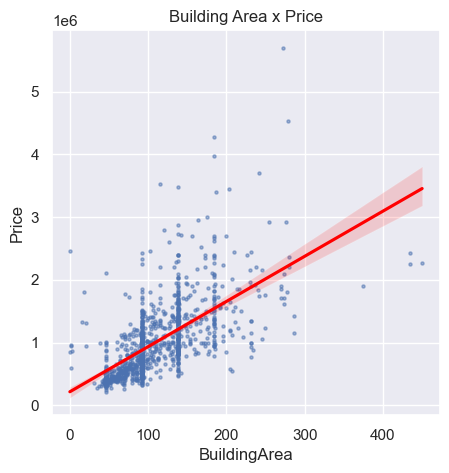

In [29]:
# Create a scatter plot of BuildingArea and Price
sns.set_theme(style='darkgrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df1['BuildingArea'], y=df1['Price'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.title('Building Area x Price')
plt.show()

The `BuildingArea` variable positively correlates with the target variable `Price`.

### Hypothesis testing

The goal is to conduct a two-sample t-test.
Steps for conducting a hypothesis test:

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level
3.   Find the p-value
4.   Reject or fail to reject the null hypothesis

**Hypotheses:**

$H_0$: There is no difference in price between house in region Western Metropolitan and Northern Metropolitan (any observed difference in the sample data is due to chance or sampling variability).

$H_A$: There is a difference in price between house in region Western Metropolitan and Northern Metropolitan (any observed difference in the sample data is due to an actual difference in the corresponding population means).

We choose 5% as the significance level for this case.

In [ ]:
# Hypothesis testing

from scipy import stats

Western_Metropolitan = df1[df1["Regionname"] == "Western Metropolitan"]["Price"]
Northern_Metropolitan = df1[df1["Regionname"] == "Northern Metropolitan"]["Price"]

# Implement a t-test using the two samples
stats.ttest_ind(a=Western_Metropolitan, b=Northern_Metropolitan, equal_var=False)

TtestResult(statistic=-0.8177039705532577, pvalue=0.4138396936069618, df=621.3355013459546)

Since the p-value is larger than the chosen significance level (5%), We fail to reject the null hypothesis. We conclude that there is **not** a statistically significant difference in the Price between house in region Western Metropolitan and Northern Metropolitan.

What business insight can We draw from the result of the hypothesis test?

> The key business insight is that House Price on Western Metropolitan on average have a similar Price with house on Northern Metropolitan Region.

## Check Feature For Linear Regression

In [ ]:
cat_feature = df1.nunique()
cat_feature

Suburb            17
Address         1115
Rooms              6
Type               3
Price            553
Distance          25
Landsize         443
Bedroom2           7
BuildingArea     203
Regionname         3
dtype: int64

It seems that Address feature is will not helpful. So We are going to drop it.

In [ ]:
# drop Address feature
df1 = df1.drop("Address", axis=1)

In [ ]:
# Check categorical variable
df1['Suburb'].value_counts() 

Suburb
South Yarra        202
Port Melbourne     153
Ascot Vale         130
Kensington         117
Maribyrnong         96
North Melbourne     81
Flemington          62
Carlton             51
Carlton North       48
Melbourne           46
Southbank           41
Parkville           31
West Melbourne      31
East Melbourne      22
Travancore          10
Princes Hill         5
Docklands            3
Name: count, dtype: int64

It seems that Suburb feature maybe helpful. So We are going to keep it.

## Linear Regression

In this project We will create simple linear regression model.

List of significant variables after Exploratory Data Analysis :

Numerical:

*   Landsize
*   Distance
*   Bedroom2
*   Room2
*   Building Area

Categorical:

*   Suburb
*   Type
*   Regionname


In [ ]:
X = df1.drop("Price", axis=1)
y = df1["Price"].copy()

In [ ]:
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), ['Suburb', 'Type', 'Regionname']) ],remainder="passthrough")
X=one_hot.fit_transform(X)
X = X.toarray()
type(X)

numpy.ndarray

In [ ]:
names=one_hot.get_feature_names_out()
names

array(['one_hot__Suburb_Ascot Vale', 'one_hot__Suburb_Carlton',
       'one_hot__Suburb_Carlton North', 'one_hot__Suburb_Docklands',
       'one_hot__Suburb_East Melbourne', 'one_hot__Suburb_Flemington',
       'one_hot__Suburb_Kensington', 'one_hot__Suburb_Maribyrnong',
       'one_hot__Suburb_Melbourne', 'one_hot__Suburb_North Melbourne',
       'one_hot__Suburb_Parkville', 'one_hot__Suburb_Port Melbourne',
       'one_hot__Suburb_Princes Hill', 'one_hot__Suburb_South Yarra',
       'one_hot__Suburb_Southbank', 'one_hot__Suburb_Travancore',
       'one_hot__Suburb_West Melbourne', 'one_hot__Type_h',
       'one_hot__Type_t', 'one_hot__Type_u',
       'one_hot__Regionname_Northern Metropolitan',
       'one_hot__Regionname_Southern Metropolitan',
       'one_hot__Regionname_Western Metropolitan', 'remainder__Rooms',
       'remainder__Distance', 'remainder__Landsize',
       'remainder__Bedroom2', 'remainder__BuildingArea'], dtype=object)

In [ ]:
colunm_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]
colunm_names

['Ascot Vale',
 'Carlton',
 'Carlton North',
 'Docklands',
 'East Melbourne',
 'Flemington',
 'Kensington',
 'Maribyrnong',
 'Melbourne',
 'North Melbourne',
 'Parkville',
 'Port Melbourne',
 'Princes Hill',
 'South Yarra',
 'Southbank',
 'Travancore',
 'West Melbourne',
 'h',
 't',
 'u',
 'Northern Metropolitan',
 'Southern Metropolitan',
 'Western Metropolitan',
 'Rooms',
 'Distance',
 'Landsize',
 'Bedroom2',
 'BuildingArea']

In [ ]:
X_transform = pd.DataFrame(data = X, columns=colunm_names)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X_transform, y, test_size=0.20, random_state=42)

In [ ]:
X_train

,Ascot Vale,Carlton,Carlton North,Docklands,East Melbourne,Flemington,Kensington,Maribyrnong,Melbourne,North Melbourne,...,t,u,Northern Metropolitan,Southern Metropolitan,Western Metropolitan,Rooms,Distance,Landsize,Bedroom2,BuildingArea
490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,3.8,197.0,3.0,138.467480
394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,2.6,2488.0,1.0,50.000000
596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,4.0,3.3,141.0,4.0,127.000000
887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,3.0,2.7,0.0,3.0,120.000000
1103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,3.0,2.7,250.0,3.0,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,3.0,4.4,167.0,3.0,138.467480
1044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,2.0,4.3,16000.0,2.0,68.500000
1095,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,1.6,117.0,2.0,92.311654
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,2.0,2.3,89.0,2.0,65.000000


In [ ]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)

In [ ]:
X_test=ss.transform(X_test)
car_price_predictions = lm.predict(X_test)
car_price_predictions

array([1813374.01295612, 1213310.01295612, 1540990.01295612,
        400766.01295612,  678782.01295612,  672638.01295612,
        772990.01295612, 1647486.01295612, 1657726.01295612,
       1037182.01295612, 1266558.01295612, 1217406.01295612,
        981886.01295612,  509566.01295612, 1074046.01295612,
       1049470.01295612,  701310.01295612,  541566.01295612,
       1434238.01295612, 1369726.01295612,  881534.01295612,
        542078.01295612, 1049470.01295612, 1645438.01295612,
        941438.01295612, 1457022.01295612,  891774.01295612,
       1452926.01295612, 1438590.01295612,  611710.01295612,
        564862.01295612, 1946494.01295612, 1416062.01295612,
        799614.01295612,  281726.01295612,  101246.01295612,
        845694.01295612, 1440638.01295612,  502398.01295612,
        805758.01295612, 1315710.01295612,  875390.01295612,
       1252222.01295612,  982398.01295612, 1246078.01295612,
       1237886.01295612,  631678.01295612,  883582.01295612,
       1375102.01295612,

In [ ]:
mse = mean_squared_error(y_test, car_price_predictions)
mse

132945369327.61014

In [ ]:
lm.score(X_test,y_test)

0.6249380401645823

In [ ]:
r2_score(y_test,car_price_predictions)

0.6249380401645823

In [ ]:
# Importance of each feature
lm.coef_

array([-2.10723256e+18, -2.12732494e+18, -2.12732494e+18, -7.49172099e+17,
       -1.38059551e+18, -2.41573639e+18, -3.21079176e+18, -1.95159590e+18,
       -2.07445713e+18, -2.64629648e+18, -1.71696688e+18, -5.57660055e+18,
       -7.76547145e+17, -6.08497222e+18, -2.94637668e+18, -6.82236578e+17,
       -1.78229091e+18, -4.68288459e+18, -2.61025930e+18, -4.68552285e+18,
       -9.70729427e+18, -6.75428353e+18, -9.32866370e+18,  1.82144000e+05,
       -1.11616000e+05,  2.48000000e+04, -3.16160000e+04,  1.81120000e+05])

In [ ]:
# Change to dataframe so it will easier to read
coefs = pd.DataFrame(lm.coef_, columns=["Coefficients"], index=colunm_names)
coefs


,Coefficients
Ascot Vale,-2.107233e+18
Carlton,-2.127325e+18
Carlton North,-2.127325e+18
Docklands,-7.491721e+17
East Melbourne,-1.380596e+18
Flemington,-2.415736e+18
Kensington,-3.210792e+18
Maribyrnong,-1.951596e+18
Melbourne,-2.074457e+18
North Melbourne,-2.646296e+18


In [ ]:
# Top 3 Most Importance feature
coefs_sorted = coefs.sort_values(by=["Coefficients"],ascending=False)
coefs_sorted.head(3)

,Coefficients
Rooms,182144.0
BuildingArea,181120.0
Landsize,24800.0


## Conclusion and recomendation

1. House with 2 and 3 Rooms is most popular. If considering the type, type u (unit, duplex) and type h(house, cottage, villa, semi, terrace) are more popular than type t(townhouse). Be careful with large house type townhouse and has many rooms, it may hard to get sold. Instead, The marketing team can boost the sales by focusing on small and medium house that has type u or h which very sought after by the market.
2. Event though it seems counter intuitive, Region doesn't really affect the price. It has proved by the hypothesis testing. So the marketing team shoud not increase the house price just because it located on certain region.
3. Top 3 most importance feature that affect the house price are Number of rooms, Building Area, and Land size. The marketing team should focus on these feature to determine the house price.
